Caminho:


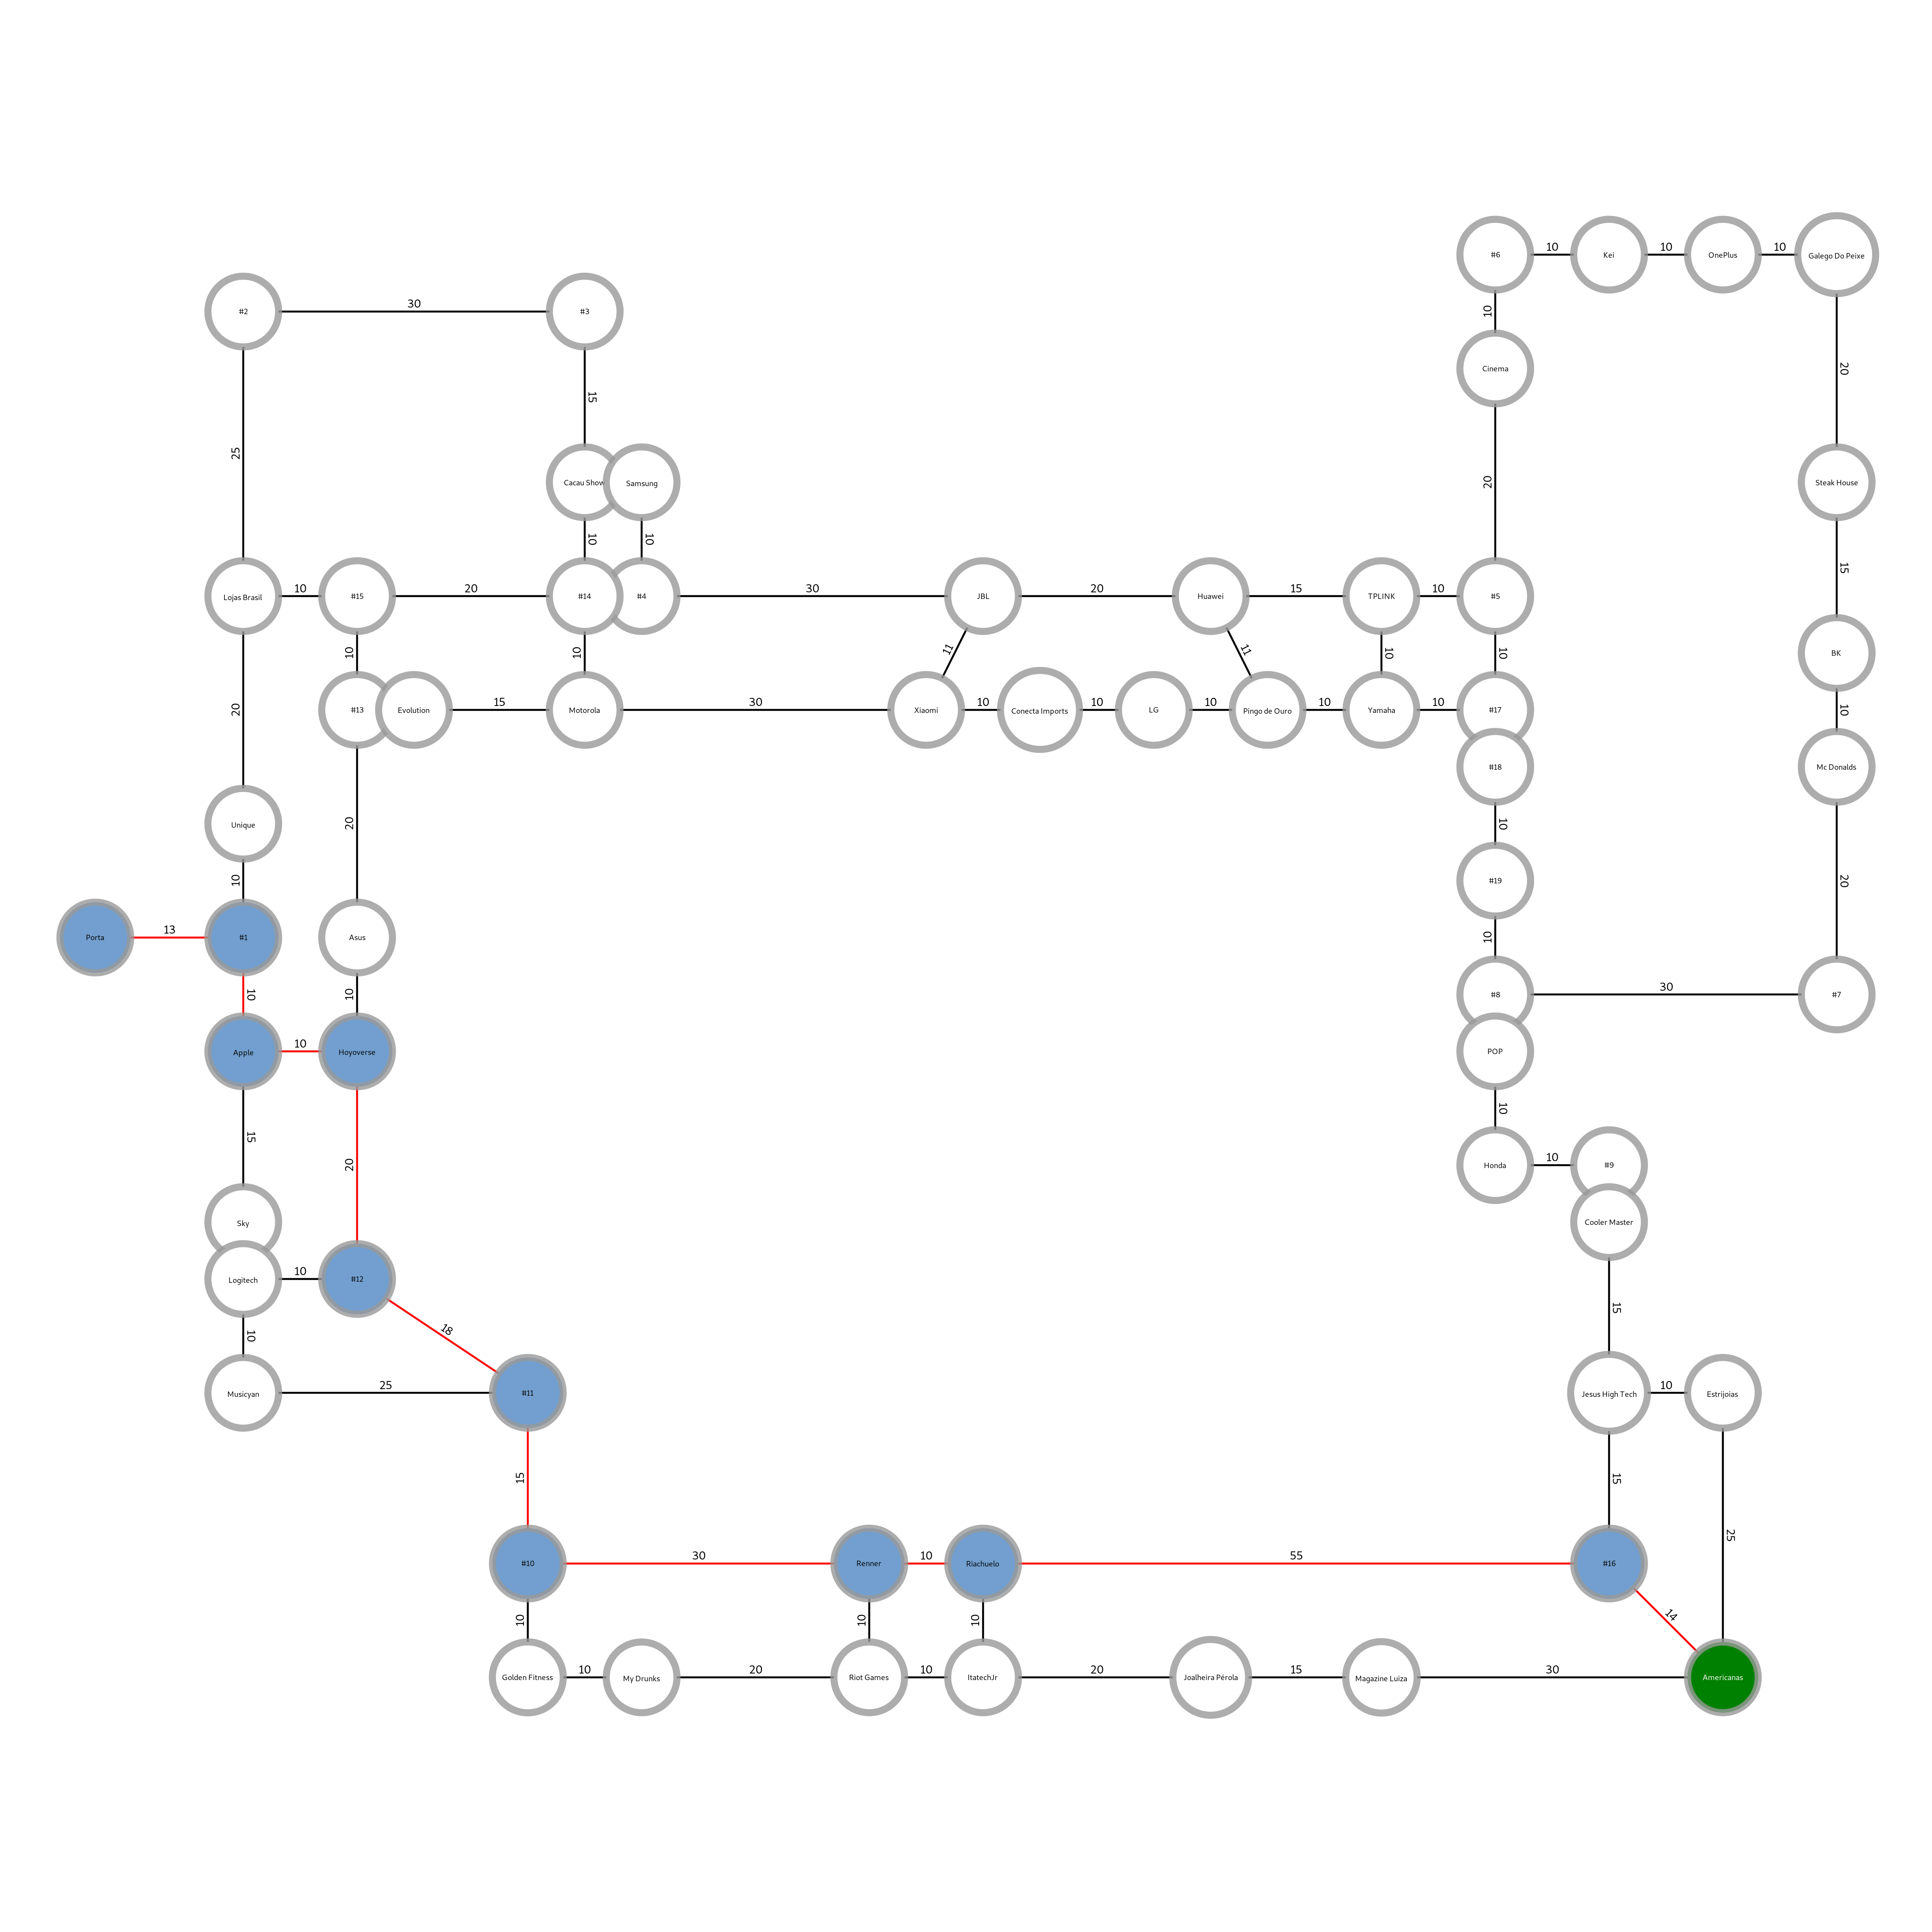

In [1]:
import graph_tool.all as gt                       # Biblioteca para GRAFO
import csv   

def LerCaminho(arquivo):
    arq = open(arquivo)

    caminho = [] 
    for linha in arq:
        valores = linha.split(";")
        
    for valor in valores:
        caminho.append(int(valor))
    
    return caminho
        
def MostrarCaminho(arquivo):
    # Biblioteca para Leitura do csv
    g = gt.Graph() 
    g.set_directed(False)                             # criação do objeto
    v_name = g.new_vertex_property("string")          # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string  
    v_pos  = g.new_vertex_property("vector<double>")
    e_distance = g.new_edge_property("string") 
    e_weight = g.new_edge_property("float")  
    e_action = g.new_edge_property("string") 
    bfse_color = g.new_edge_property("string")  
    bfsv_color = g.new_vertex_property("string") 

    #Criação dos vértices no grafo à partir do arquivo .csv de vértices
    f_network = open("vertices.csv", 'r', encoding='utf-8')
    reader_network = csv.reader(f_network, delimiter=",")

    vposX = []
    vposY = []
    distancias = []
    for vertice in reader_network:
        v = g.add_vertex()
        v_name[v] = str(vertice[1]) # Adicionando nome do vertice
        vposX.append(vertice[5]) # Adicionando posição X
        vposY.append(vertice[6]) # Adicionando posição Y
    f_network.close()

    #Criação das arestas no grafo à partir do arquivo .cvs de arestas
    f_network = open("arestas.csv", 'r', encoding='utf-8')
    reader_network = csv.reader(f_network, delimiter=",")
    for edge in reader_network:
        e = g.add_edge(int(edge[0]), int(edge[1]))
        bfse_color[e] = "black"
        e_weight[e] = float(edge[2])
        e_distance[e] = str(edge[3])

    f_network.close()

    #Preenchendo as posições X e Y dos vértices
    for v in g.vertices():
        v_pos[v] = (vposX[int(v)],vposY[int(v)])
    #Pintando os vertices
    for v in g.vertices():
        bfsv_color[v] = "white"
    #Pintando as arestas
    for e in g.edges():
        bfse_color[e] = "black"
        
    id_caminho = LerCaminho(arquivo)
    #Pintando o caminho
    destino = id_caminho[-1] #pegando o id do destino
    #print("Caminho:")
    for v in g.vertices(): 
        if v in id_caminho: #comparando se o id do vertice esta no caminho
            bfsv_color[v] = "#729fcf" # pintando o vertice de azul
            if v == destino:
                bfsv_color[v] = "green"      
            #print(v_name[v])
            for edge in v.out_edges(): #retornar as arestas daquele vertice v
                if edge.target() in id_caminho: #target: retornar a arestar de destino daquele vertice
                    bfse_color[edge] = "red"

    gt.graph_draw(g, pos=v_pos,
                   vertex_text= v_name,
                   edge_text = e_distance,
                   edge_color= bfse_color,
                   edge_pen_width = 5,  
                   vertex_font_size=20,
                   edge_font_size = 30,
                   vertex_shape="circle",
                   vertex_fill_color=bfsv_color,
                   output_size=(5000, 5000))
                   #output="two-nodes.png")
arquivo_teste = "teste.txt"   
MostrarCaminho(arquivo_teste) 
    